In [1]:
!pip install pymatgen
!pip install mp_api
from pymatgen.core.composition import Composition
from pymatgen.core.periodic_table import Element
from pymatgen.core.structure import Structure
import pandas as pd
import numpy as np
import plotly as pt
import seaborn as sns
import requests
import json
import os
import plotly.express as px


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.1/809.1 kB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 753.1/753.1 kB 47.5 MB/s eta 0:00:00
  Created wheel for bibtexparser: filename=bibtexparser-1.4.3-py3-none-any.whl size=43549 sha256=2bc47948e6f8f2518c762acab627eea192b59534567a86bc7f53905970be702b
  Stored in directory: /root/.cache/pip/wheels/1f/7d/e9/1ff2509f13767a55df1279744adfb757f4ab94b2cbe761f56a
Successfully built bibtexparser
   ━━━━━━━━━━━━━━━━━━━

In [2]:
df = pd.read_excel("/content/drive/MyDrive/University/Artificial intelligence in chemistry/Perovskite project/Perovskite-liked-oxides-bandgap-prediction/Data/Perovskite dataset.xlsx",sheet_name='Export')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 62 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Perovskite                            523 non-null    object 
 1   Hill formula                          523 non-null    object 
 2   Interlayer space composition          3 non-null      object 
 3   Dopant                                53 non-null     object 
 4   Dopant, wt%                           42 non-null     float64
 5   Bandgap, eV                           523 non-null    float64
 6   DOI                                   518 non-null    object 
 7   Materials Project ID                  518 non-null    object 
 8   COD_ID                                518 non-null    object 
 9   Springer_ID                           57 non-null     object 
 10  Z                                     257 non-null    float64
 11  Z_MP               

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 62 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Perovskite                            523 non-null    object 
 1   Hill formula                          523 non-null    object 
 2   Interlayer space composition          3 non-null      object 
 3   Dopant                                53 non-null     object 
 4   Dopant, wt%                           42 non-null     float64
 5   Bandgap, eV                           523 non-null    float64
 6   DOI                                   518 non-null    object 
 7   Materials Project ID                  518 non-null    object 
 8   COD_ID                                518 non-null    object 
 9   Springer_ID                           57 non-null     object 
 10  Z                                     257 non-null    float64
 11  Z_MP               

In [6]:
def averaging_valence_electron_density(MP,COD,Springer):
  sum=0;
  count=0;
  print(MP)
  print(COD)
  print(Springer)
  if(pd.notna(MP)):
    sum+=MP
    count+=1
  if(pd.notna(COD)):
    sum+=COD
    count+=1
  if(pd.notna(Springer)):
    sum+=Springer
    count+=1
  print('Count: ',count)
  if count==0:
    return 0
  return sum/count


In [7]:
def averaging_4(MP,COD,Springer,manual):
  sum=0;
  count=0;
  print(MP)
  print(COD)
  print(Springer)
  print(manual)
  if(pd.notna(MP)):
    sum+=MP
    count+=1
  if(pd.notna(COD)):
    sum+=COD
    count+=1
  if(pd.notna(Springer)):
    sum+=Springer
    count+=1
  if(pd.notna(manual)):
    sum+=manual
    count+=1
  print('Count: ',count)
  if count==0:
    return 0
  return sum/count

In [ ]:
df.columns

Index(['Perovskite', 'Hill formula', 'Interlayer space composition', 'Dopant',
       'Dopant, wt%', 'Bandgap, eV', 'DOI', 'Materials Project ID', 'COD_ID',
       'Springer_ID', 'Z', 'Z_MP', 'Z_COD', 'Z_Springer', 'a, A', 'b, A',
       'c, A', 'Symmetry group', 'd,A', 'a_MP', 'b_MP', 'c_MP', 'a_COD',
       'b_COD', 'c_COD', 'a_Springer', 'b_Springer', 'c_Springer',
       'Number of octahedrons on a layer', 'Valence electrons', 'Volume',
       'Volume_MP', 'Volume_COD', 'Volume_Springer',
       'Valence Electrons Density', 'Valence Electrons Density_MP',
       'Valence Electrons Density_COD', 'Springer_Valence Electrons Density',
       'avg s valence electrons', 'avg p valence electrons',
       'avg d valence electrons', 'avg f valence electrons',
       'frac s valence electrons', 'frac p valence electrons',
       'frac d valence electrons', 'frac f valence electrons',
       'MagpieData minimum Electronegativity',
       'MagpieData maximum Electronegativity',
       'Magpie

In [8]:
#df['Valence Electrons Density'] = df.apply(lambda x: averaging_valence_electron_density(x['Valence Electrons Density_MP'], x['Valence Electrons Density_COD'],x['Springer_Valence Electrons Density']), axis=1)
df['Valence Electrons Density avg'] = df.apply(lambda x: averaging_4(x['Valence Electrons Density_MP'], x['Valence Electrons Density_COD'],x['Springer_Valence Electrons Density'],x['Valence Electrons Density']), axis=1)

0.07696465124784942
0.08096100367603028
nan
nan
Count:  2
0.08067070934824143
0.04267432349671339
nan
nan
Count:  2
0.0802272140905539
nan
nan
nan
Count:  1
0.07791633538098053
0.08214000614035505
nan
nan
Count:  2
0.08651015304565358
0.09057669425458144
nan
nan
Count:  2
0.08319251751861964
0.09008620157303462
nan
nan
Count:  2
0.08410254452742943
0.08841182372752909
nan
nan
Count:  2
nan
nan
nan
0.08701336922366086
Count:  1
nan
nan
nan
0.09284918909384524
Count:  1
0.1014592151701775
0.1227333894874388
nan
nan
Count:  2
0.08091951019336545
nan
nan
nan
Count:  1
nan
nan
0.08508481120279507
nan
Count:  1
nan
nan
0.08587619485668391
nan
Count:  1
nan
nan
0.08687491353195365
nan
Count:  1
0.09896756088868755
0.1019300990901566
nan
nan
Count:  2
0.1007300264509579
0.1015976473163669
nan
nan
Count:  2
0.06203101837662062
0.09498790799310944
nan
nan
Count:  2
0.09512661537359826
0.09715147636323364
nan
nan
Count:  2
0.09229252802904218
0.09430802593099148
nan
nan
Count:  2
0.09047000984653

In [9]:
df['Oxygen_concentration avg'] = df.apply(lambda x: averaging_4(x['Oxygen_concentration_MP'], x['Oxygen_concentration_COD'],x['Oxygen_concentration_Springer'],x['Oxygen_concentration']), axis=1)

0.03848232562392471
0.04048050183801513
nan
inf
Count:  3
0.0403353546741207
0.0213371617483567
nan
nan
Count:  2
0.04011360704527694
nan
nan
nan
Count:  1
0.03895816769049026
0.04107000307017752
nan
nan
Count:  2
0.04325507652282679
0.04528834712729072
nan
nan
Count:  2
0.04159625875930982
0.04504310078651731
nan
nan
Count:  2
0.04205127226371472
0.04420591186376455
nan
nan
Count:  2
0.0
nan
nan
0.04350668461183043
Count:  2
0.0
nan
nan
0.04642459454692262
Count:  2
0.05072960758508873
0.06136669474371937
nan
nan
Count:  2
0.04045975509668272
nan
nan
nan
Count:  1
nan
nan
0.04254240560139753
nan
Count:  1
nan
nan
0.04293809742834195
nan
Count:  1
nan
nan
0.04343745676597682
nan
Count:  1
0.04948378044434377
0.05096504954507831
nan
nan
Count:  2
0.05036501322547896
0.05079882365818344
nan
nan
Count:  2
0.03101550918831031
0.04749395399655472
nan
nan
Count:  2
0.04756330768679914
0.04857573818161682
nan
nan
Count:  2
0.04614626401452109
0.04715401296549574
nan
nan
Count:  2
0.0452350049

In [10]:
df['Packing fraction avg'] = df.apply(lambda x: averaging_valence_electron_density(x['MP_packing_fraction'], x['COD_packing_fraction'],x['Springer_packing_fraction']), axis=1)

0.4826438387800216
0.5077048875313984
nan
Count:  2
0.4845036484217956
nan
nan
Count:  1
0.5073439250410097
nan
nan
Count:  1
0.5243291310951993
0.5527518438481355
nan
Count:  2
0.5055520602657504
0.0
nan
Count:  2
0.5046768858512067
0.546496548296758
nan
Count:  2
0.5340727942335419
0.5614378257728565
nan
Count:  2
nan
nan
nan
Count:  0
nan
nan
nan
Count:  0
0.4690040702686963
0.5673457963471578
nan
Count:  2
0.5117218936152963
nan
nan
Count:  1
nan
nan
0.5338126513486867
Count:  1
nan
nan
0.5380929790397749
Count:  1
nan
nan
0.5419466597788346
Count:  1
0.4986019275972806
0.5135272955114646
nan
Count:  2
0.5362582325986015
0.5408772012243707
nan
Count:  2
0.3520613573779425
0.5391104756575985
nan
Count:  2
0.5232572379935014
nan
nan
Count:  1
0.5252456022964098
0.5367159935842445
nan
Count:  2
0.5360948309320074
nan
nan
Count:  1
0.4754156385457599
nan
nan
Count:  1
0.5020564560692355
0.5406496876463449
nan
Count:  2
0.5080602676196672
0.0
nan
Count:  2
0.5199561625807192
0.519881407

In [11]:
df.to_excel('averaging.xlsx')

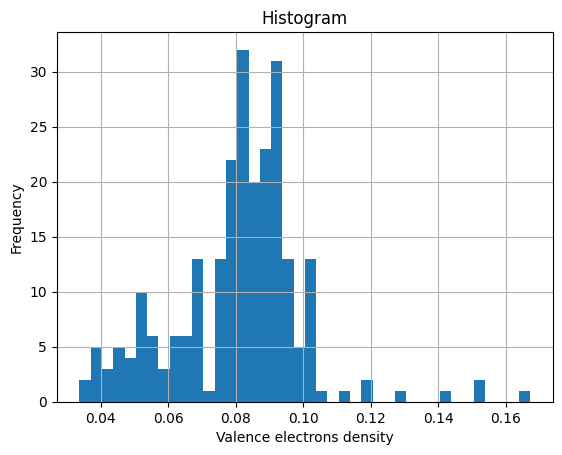

In [12]:
import matplotlib.pyplot as plt
df['Valence Electrons Density'].hist(bins=40)
plt.title('Histogram')
plt.xlabel('Valence electrons density')
plt.ylabel('Frequency')
plt.show()

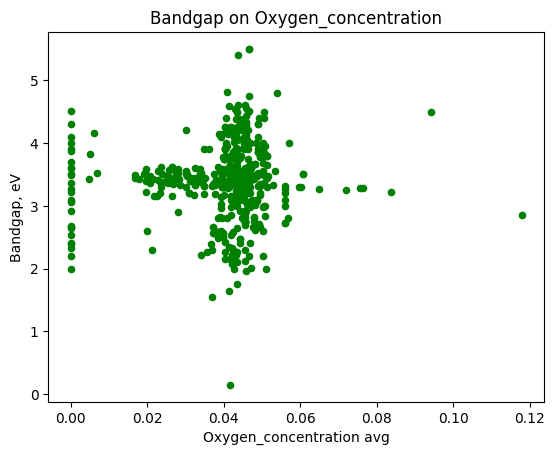

In [13]:
df.plot.scatter(x='Oxygen_concentration avg', y='Bandgap, eV', color='green', title='Bandgap on Oxygen_concentration')
plt.show()

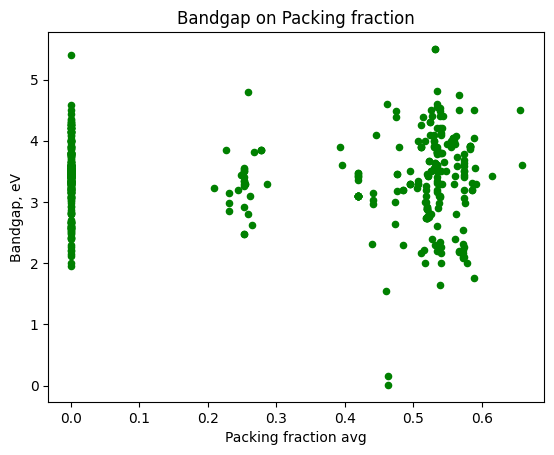

In [15]:
df.plot.scatter(x='Packing fraction avg', y='Bandgap, eV', color='green', title='Bandgap on Packing fraction')
plt.show()

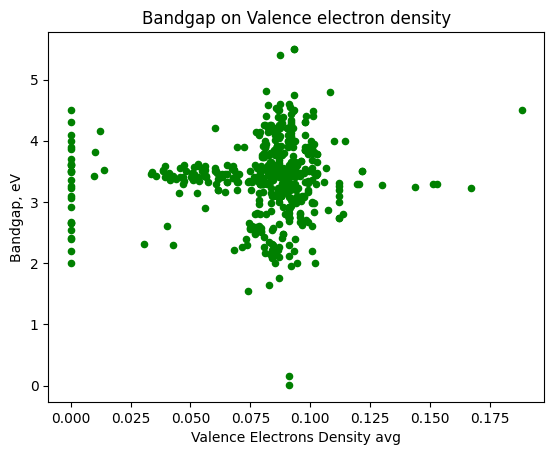

In [16]:
df.plot.scatter(x='Valence Electrons Density avg', y='Bandgap, eV', color='green', title='Bandgap on Valence electron density')
plt.show()